In [1]:
#|default_exp app

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

In [7]:
from duckduckgo_search import ddg_images
#from fastcore.all import *
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searching for 'donut photos'


'http://images.unsplash.com/photo-1551024601-bec78aea704b?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max'

In [8]:
from fastdownload import download_url
dest = 'donut.jpg'
urls = search_images('donut photos', max_images=1)
download_url(urls[0], dest, show_progress=False)

Path('donut.jpg')

In [10]:
urls = search_images('scone photos', max_images=1)
urls[0]

Searching for 'scone photos'


'https://www.janespatisserie.com/wp-content/uploads/2015/02/IMG_9481.jpg'

In [11]:
dest = 'scone.jpg'
download_url(urls[0], dest, show_progress=False)

Path('scone.jpg')

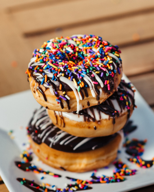

In [9]:
im=PILImage.create('donut.jpg')
im.thumbnail((192,192))
im

In [16]:
#|export
from fastcore.all import *
learn = load_learner('donut_model2.pkl')

In [17]:
learn.predict(im)

('donut', TensorBase(0), TensorBase([9.9993e-01, 6.8589e-05]))

In [18]:
#|export
categories = ('donut', 'scone')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [19]:
classify_image(im)

{'donut': 0.9999314546585083, 'scone': 6.85889390297234e-05}

In [21]:
#|export
image = gr.inputs.Image(shape = (192,192))
label = gr.outputs.Label()
examples = ['donut.jpg', 'scone.jpg']

intf = gr.Interface(fn = classify_image, inputs = image, outputs = label, examples = examples)
intf.launch(inline=False, share=True)

/diskmnt/Projects/Users/yigewu/tools/miniconda3/envs/deep_learning/lib/python3.10/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/diskmnt/Projects/Users/yigewu/tools/miniconda3/envs/deep_learning/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/diskmnt/Projects/Users/yigewu/tools/miniconda3/envs/deep_learning/lib/python3.10/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/diskmnt/Projects/Users/yigewu/tools/miniconda3/envs/deep_learning/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.wa

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://dba9753ffbaa6b77.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fb527720100>,
 'http://127.0.0.1:7861/',
 'https://dba9753ffbaa6b77.gradio.app')

# *export*

In [28]:
import nbdev
nbdev.export.nb_export('app.ipynb', 'app')